### 1. Project Overview
- Test Objective: Compare conversion rates between currents vs. redesigned install button
-  Hypotheses:
    - H_0: No difference in install rates(p1=p2)
    - H_1: Redesigned button affects install rates(p1 != p2)
-  Significance level: alpha = 0.05
-  Statistical Test: Fisher's Exact Test(binary outcome)

### 2. Data Preparation

In [15]:
import pandas as pd
# Sample data structure (replace with actual data)
data ={
    'variant':['control']*1000 + ['treatment']*1000,
    'installed':[1]*50 + [0]*950 + [1] * 75 + [0] * 925
}

print(data['variant'].value_counts())
data.head()


AttributeError: 'list' object has no attribute 'value_counts'

> #### AttributeError: 'list' object has no attribute 'value_counts'
This error occurs because I was trying to use the `value_counts()` methods on a list, but this method is only available for pandas Series objects.
Fix:
> 1. Frist, convert your dictionary to a pandas DataFrame
> 2. Then you can use `value_counts()` on the columns

In [20]:
#convert to DataFrame
df =pd.DataFrame(data)
#now you can use value_counts
print(df['variant'].value_counts())
#display the head of the DataFrame
print(df.head())

variant
control      1000
treatment    1000
Name: count, dtype: int64
   variant  installed
0  control          1
1  control          1
2  control          1
3  control          1
4  control          1


### 3. Exploratory Analysis

#### conversion rates


In [25]:
import numpy as np

conversion_rates = df.groupby('variant')['installed'].mean()
print(conversion_rates)

variant
control      0.050
treatment    0.075
Name: installed, dtype: float64


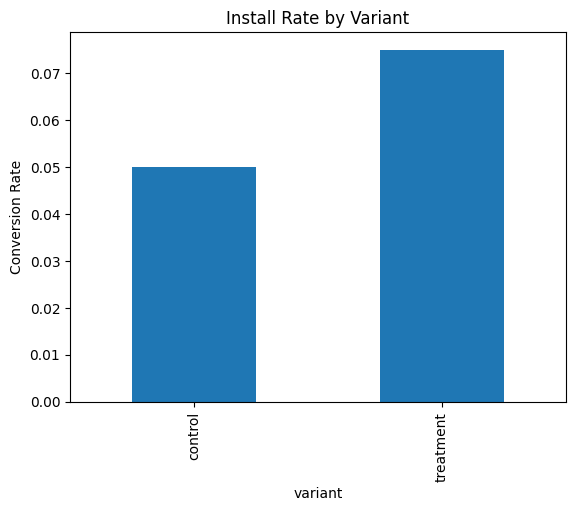

In [29]:
#Visualization
import matplotlib.pyplot as plt

conversion_rates.plot(kind='bar',title='Install Rate by Variant')
plt.ylabel('Conversion Rate')
plt.show()

### 4. Statistical Testing


In [32]:
#create contingency table 
contg_table=pd.crosstab(df['variant'],df['installed'])
print(contg_table)

installed    0   1
variant           
control    950  50
treatment  925  75


In [36]:
# Fisher's Exact Test
from scipy.stats import fisher_exact

odds_ratio,p_value = fisher_exact(contg_table,alternative='two-sided')
print(f'Odds Ratio: {odds_ratio:.3f}')
print(f'P-value: {p_value:.4f}')

Odds Ratio: 1.541
P-value: 0.0263


> This means the redesigned button (treatment) had **1.54x** higher odds of being installed compared to the original button (control).

> The **p-value < 0.05** indicates this result is **statistically significant**.

In [38]:
#effect size calculation

def relative_uplift (control_rate, treatment_rate):
    return (treatment_rate - control_rate)/control_rate


uplift = relative_uplift(conversion_rates['control'],conversion_rates['treatment'])
print(f'Relative Uplift: {uplift:.1%}')

Relative Uplift: 50.0%


> There is **50.0%** relative uplift between Treatment and Controlled means new design have **50.0%** better performance then old design.